# Image Segmentation with Watershed Algorithm

http://cmm.ensmp.fr/~beucher/wtshed.html

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('data/stones.jpg')
org=np.copy(img)
img=255-img
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh,cmap='gray')

In [2]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 1)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=1)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)
ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

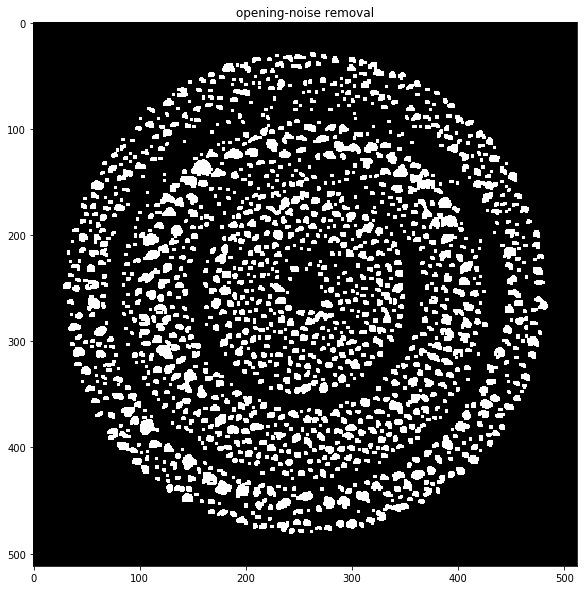

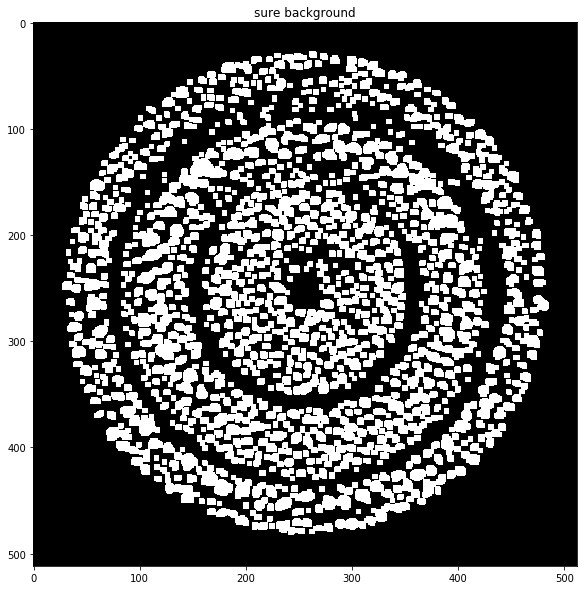

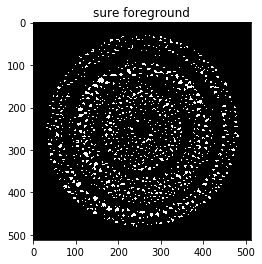

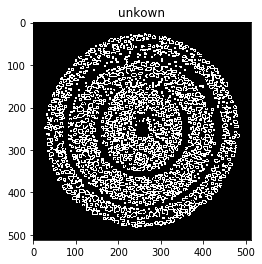

In [3]:
plt.figure(figsize=(10,10))
plt.title('opening-noise removal')
plt.imshow(opening,cmap='gray')
plt.figure(figsize=(10,10))
plt.title('sure background')
plt.imshow(sure_bg,cmap='gray')
plt.figure()
plt.title('sure foreground')
plt.imshow(sure_fg,cmap='gray')
plt.figure()
plt.title('unkown')
plt.imshow(unknown,cmap='gray')

In [4]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [5]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

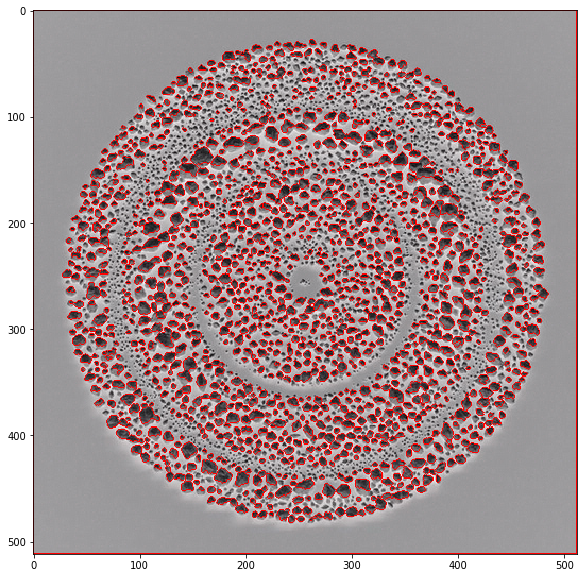

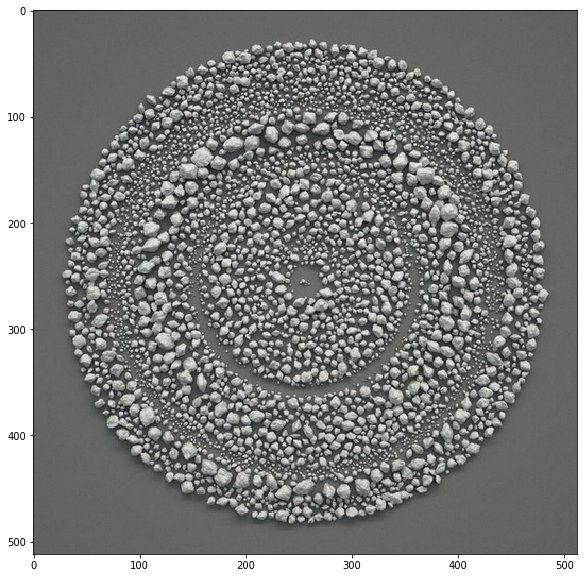

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.figure(figsize=(10,10))
plt.imshow(org)